# Classification:
Classifying data is a common task in supervised machine learning. Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in.

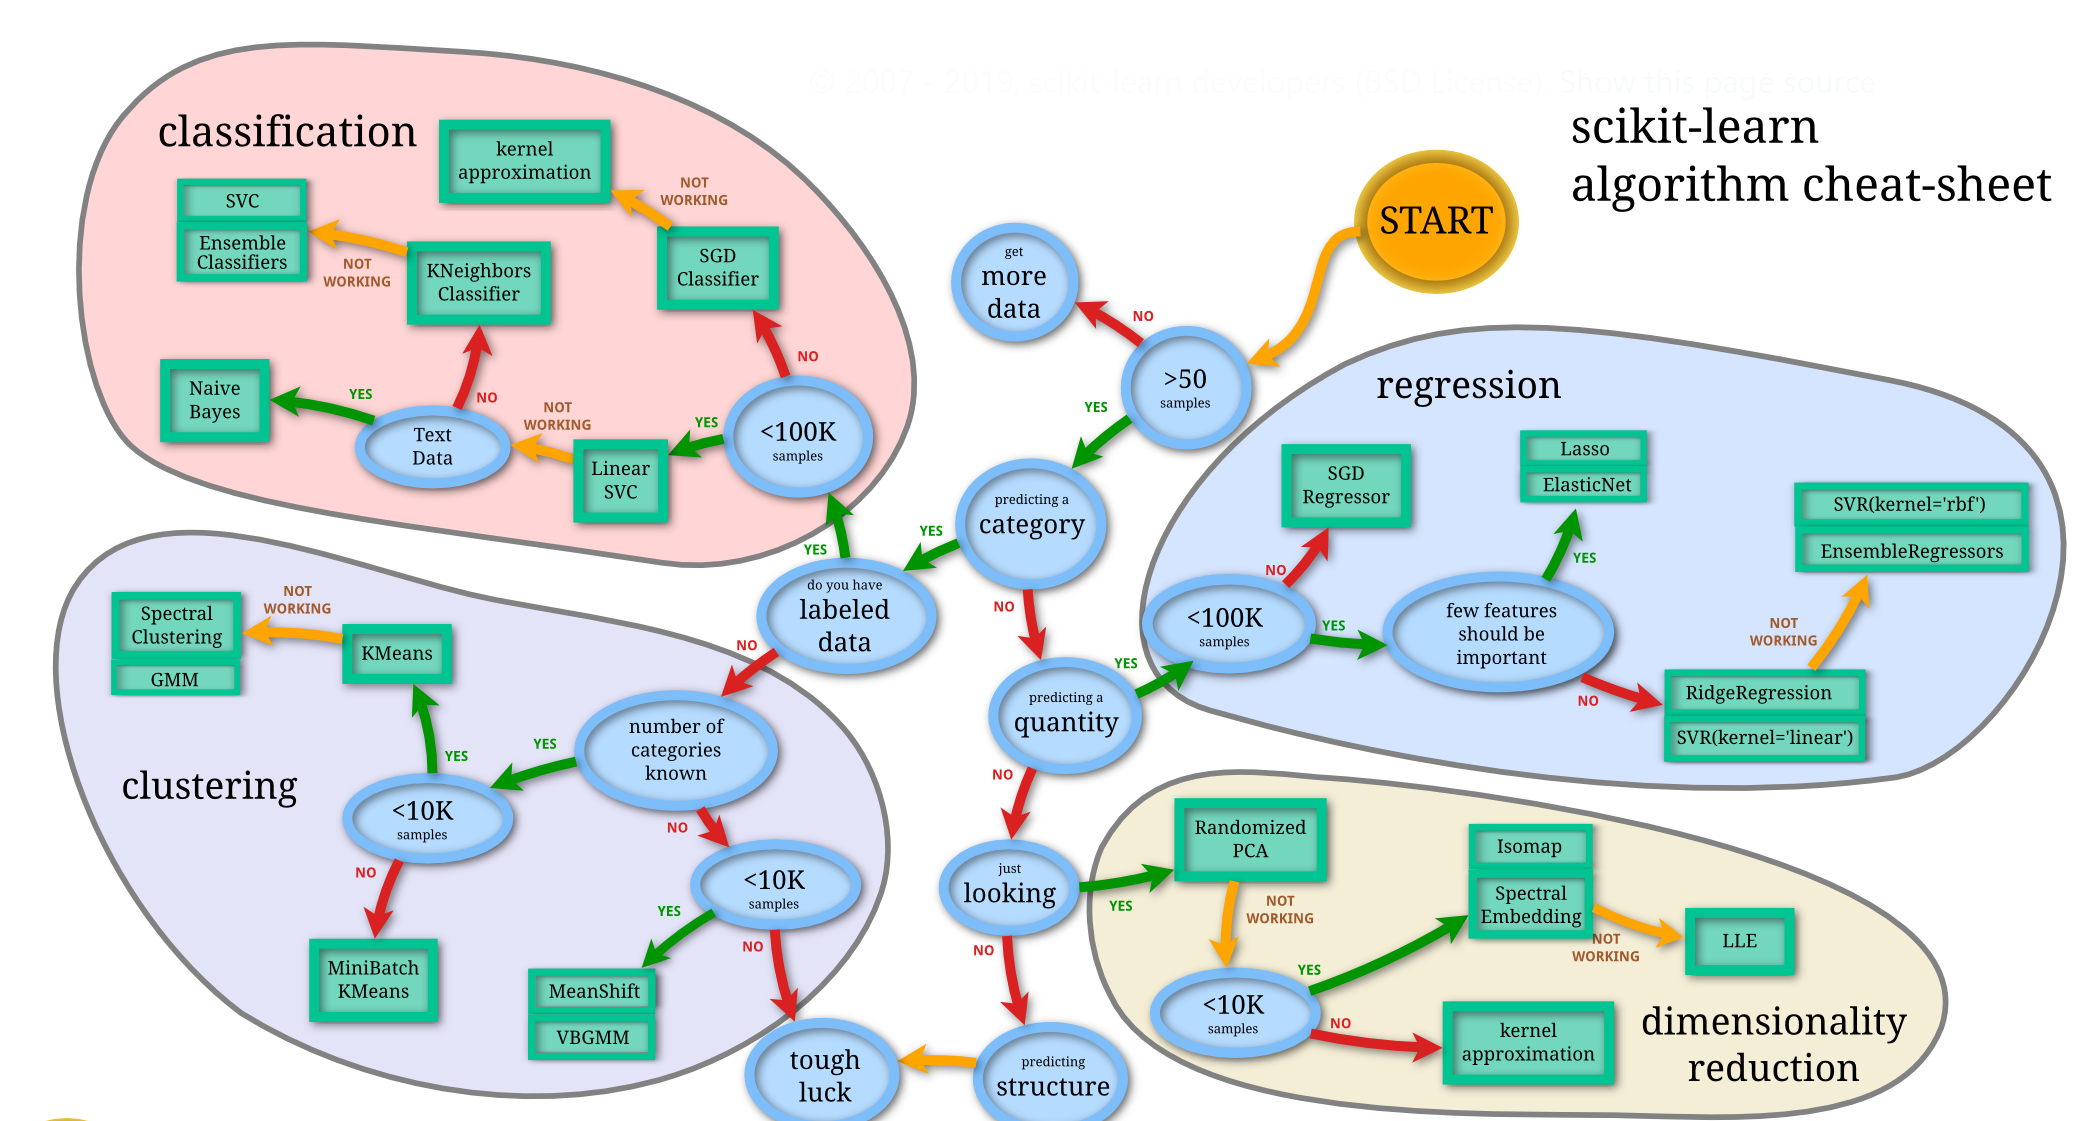

**As any ML project it has a pipline to follow:**
1) Big picture and Framing the problem.\
2) Data Wrangling and EDA.\
3) Data preparing.\
4) Model Selection.\
5) Performance assessing.\
6) Fine-Tuning parameters.

___
## Data Loading and Exploratory data Analysis :
In this step we are trying to Load our data and read it into a variable so we can perform our data Analysis so we can understand our data well.\
This step is usually called a data wrangling step which consists of three inner steps:
* **Data Gathering**: it's the first step in which we gather our data from many different sources like exisited files in different formats e.g.(CSV, TSV, JSON,...), from databases or through the internet either using APIs or web scrapping via selenium or beautifulsoup or other tool.
* **Exploratory data Analysis (EDA)**: in this step our goal is to assess our data and understand it more so we can specify relationships between different features. For this step we may use different libraries to summarize and visualize the data like pandas and matplotlib.

In [1]:
# Importing required libraries:
# for data
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

**1) Data Gathering:**\
    ***For this task we are going to use the famous iris dataset imported from Sikit Learn (sklearn) library.***
    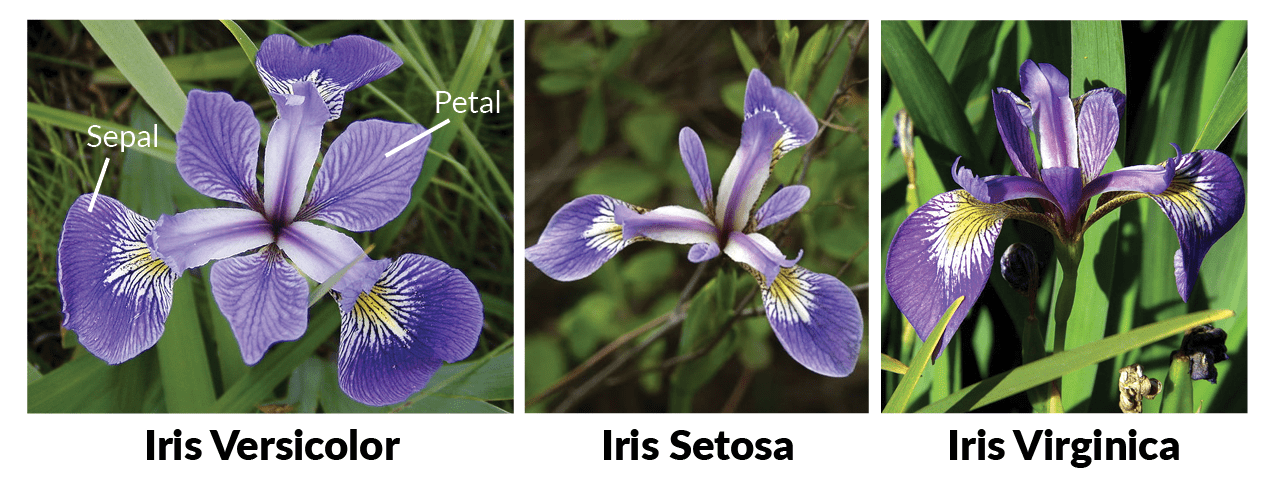

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

***We will specify our input data and targeted data.***

In [256]:
x = iris.data
y = iris.target

**2) EDA:**
***As we want to know more about data, we will follow a strategic way to do so as follows:***
* See how your data looks like; using df.head() pandas method.
* Find data types of each column of your data using df.info()methos.
* also some summary statistics df.describe() methos.
* Visualize relationships, find outliers and so on.

In [253]:
# Look what is your data type:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


***To use all the facilities of summarizing data we had to transform it into pandas data frame.***

In [254]:
x = pd.DataFrame(data=x, columns=iris.feature_names)
y = pd.DataFrame(data=y, columns=['Species'])
iris_ = pd.concat([x, y], axis=1)
iris_.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


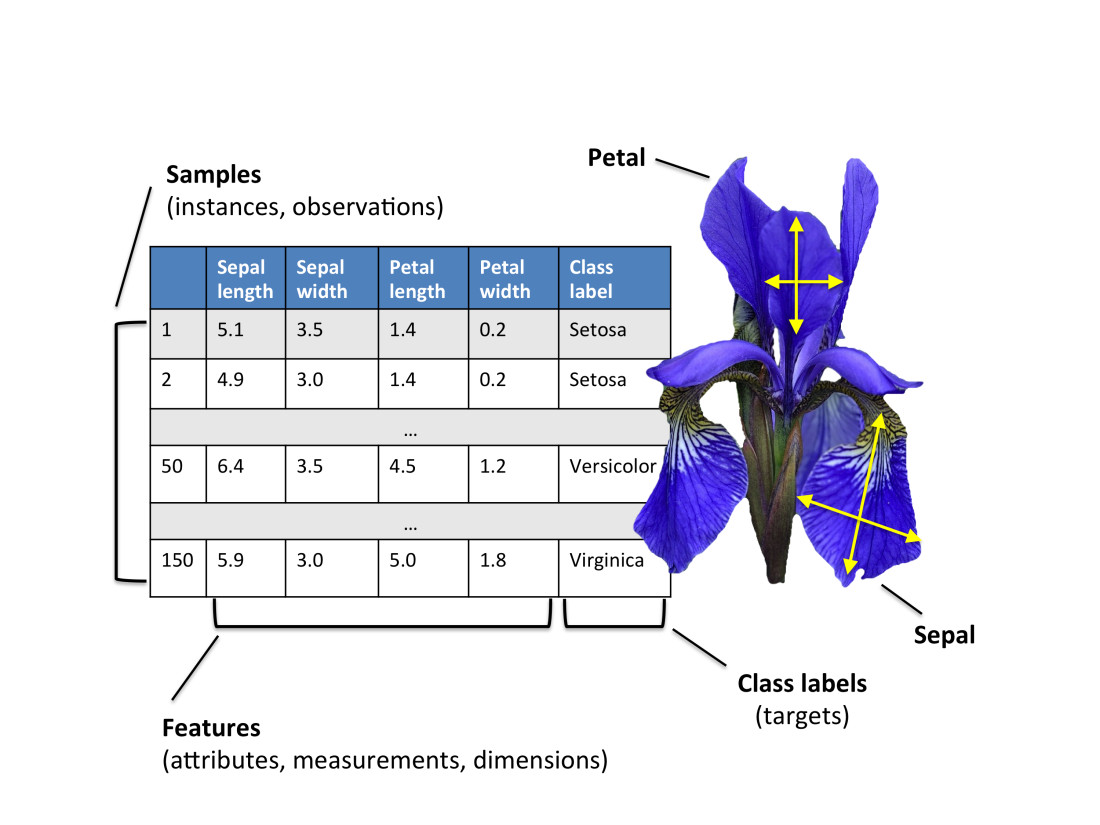

In [7]:
iris_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


***We now see that all our columns are floats with 150 non-null values.***

In [8]:
# Performing some summary statistics:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


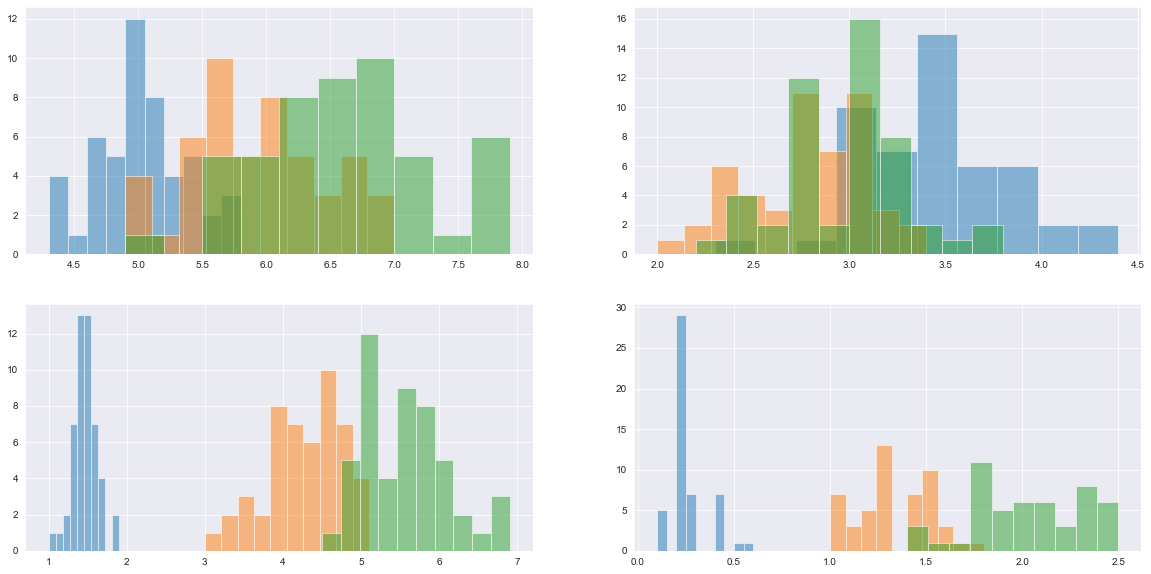

In [28]:
fg, ax = plt.subplots(2, 2, figsize=(20, 10))
iris_.groupby("Species")['sepal length (cm)'].hist(alpha=0.5, ax=ax[0,0])
iris_.groupby("Species")['sepal width (cm)'].hist(alpha=0.5, ax=ax[0,1])
iris_.groupby("Species")['petal length (cm)'].hist(alpha=0.5, ax=ax[1,0])
iris_.groupby("Species")['petal width (cm)'].hist(alpha=0.5, ax=ax[1,1])
plt.show()

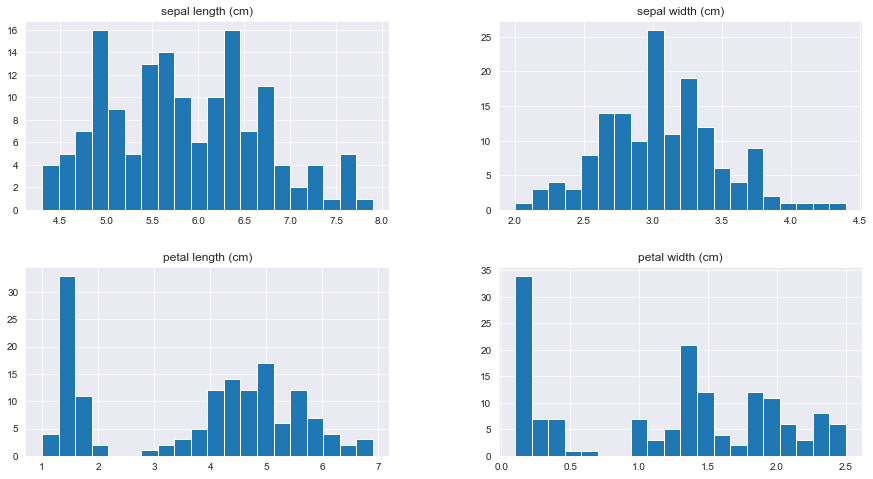

In [24]:
# Doing some Visualizations
iris_.drop('Species', axis=1).hist(bins=20, figsize=(15, 8))
plt.show()

***As we can see from these histograms there is some sort of normal distribution in the Sepal Width data, and a spreaded data in both petal length and width.***

In [10]:
sns.set_style('darkgrid')

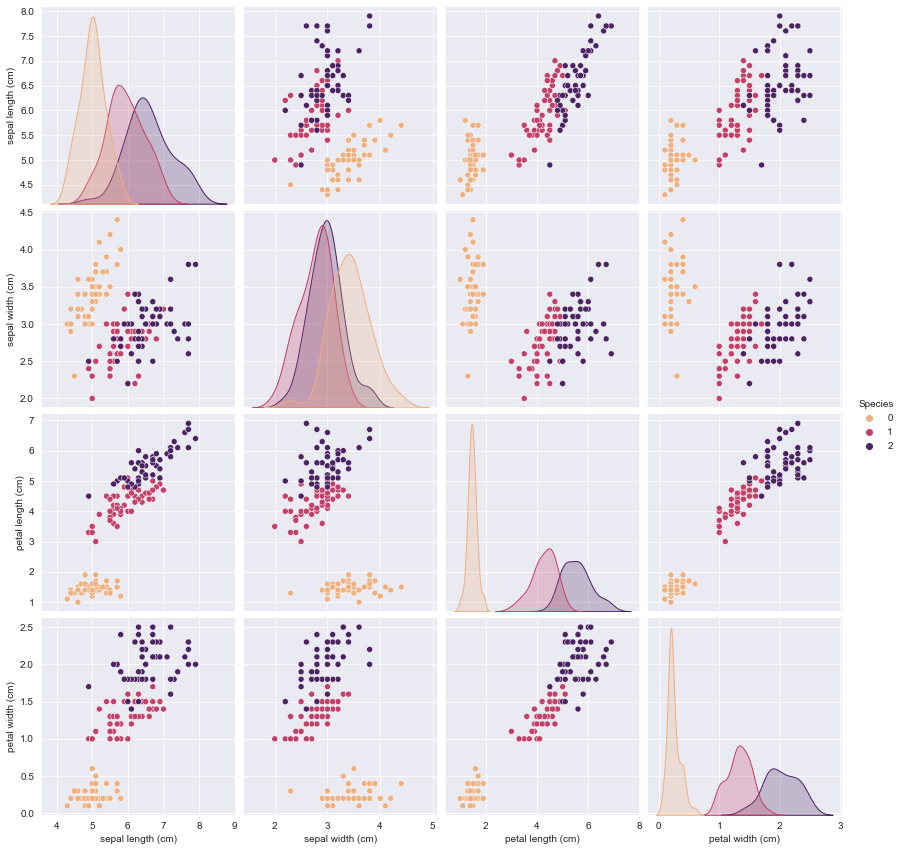

In [11]:
sns.pairplot(iris_, hue='Species', height=3, palette='flare')
plt.show()

**Another way visualizing individual features to look at spread and also some statistics of the data**

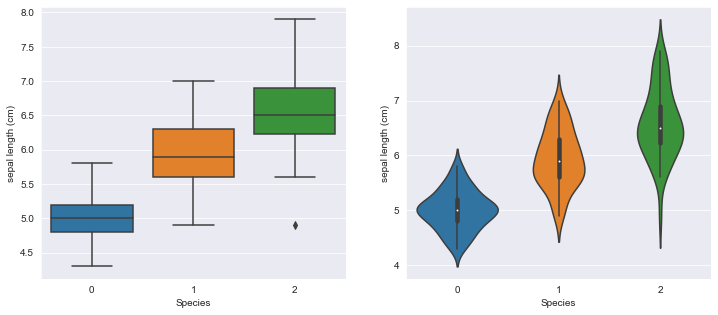

In [12]:
# the boxplot and violinplot features of seaborn are useful to look at individual features.
# boxplot gives us the Quartile Ranges of our plots and also shows outliers above fences (1.5IQR).
# Violinplot gives us a visual inspection about the most clusterings of the data, it's similat to bocplot.
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.boxplot(x="Species", y="sepal length (cm)", data=iris_, ax=ax[0])
sns.violinplot(x="Species", y="sepal length (cm)", data=iris_, size=6, ax=ax[1])
plt.show()

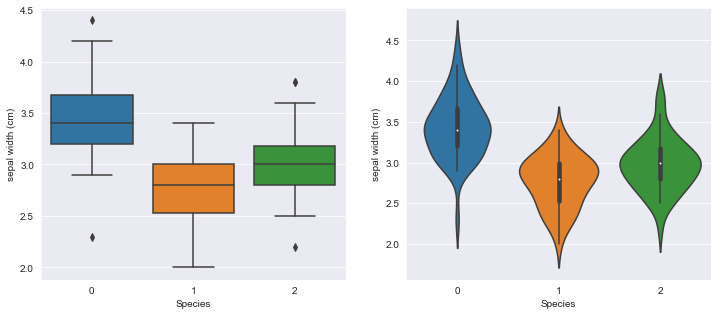

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.boxplot(x="Species", y="sepal width (cm)", data=iris_, ax=ax[0])
sns.violinplot(x="Species", y="sepal width (cm)", data=iris_, size=6, ax=ax[1])
plt.show()

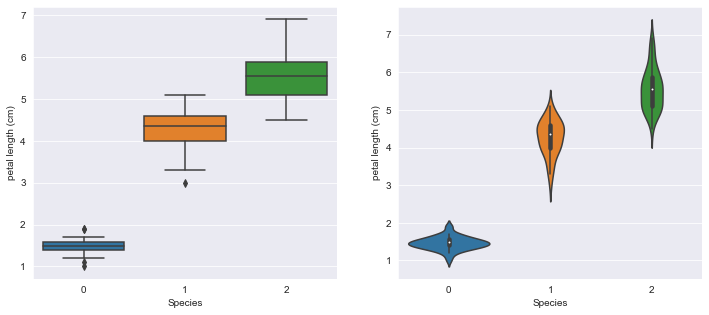

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.boxplot(x="Species", y="petal length (cm)", data=iris_, ax=ax[0])
sns.violinplot(x="Species", y="petal length (cm)", data=iris_, size=6, ax=ax[1])
plt.show()

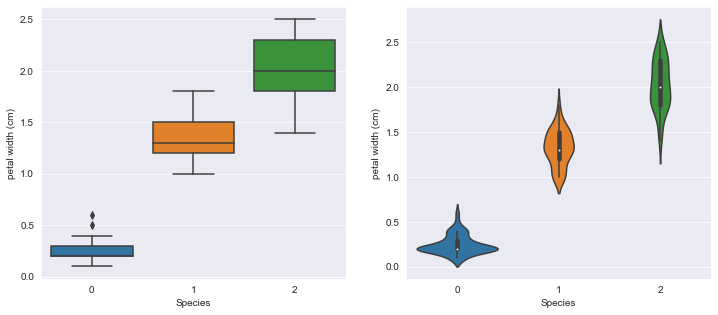

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.boxplot(x="Species", y="petal width (cm)", data=iris_, ax=ax[0])
sns.violinplot(x="Species", y="petal width (cm)", data=iris_, size=6, ax=ax[1])
plt.show()

**As we are working with a Classification task, we have to take care of the balance and impalance between different classes in our data.**

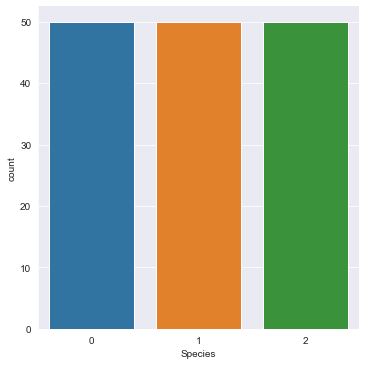

In [16]:
# We will use countplot of seaborn library.
sns.catplot(x='Species', data=iris_, kind='count')
plt.show()

**Now we now for sure that our data are balanced data, and so we can trust training of our model and it performance metrics.**

___
## Data Preparing:

**In this step we do some of operations to get our data in a good quality to train our model.**
Some of these operatins are:
#### 1) Cleaning data:
**Real world data is messy so we need to clean it up, Some of popular cleaning cases:**
* **Inconsistent values:** (Just removed as they are not valid or simply replace one of them with the value of the other).
* **Duplicated records:** (Merge duplicates and drop them).
* **missing values:** (Can be filled with appropriate value, or simply dropped).
* **Invalid data:** (Just removed).
* **Outliers:** (if not in the same trend of the whole data and may cause misleading understanding for the model, just remove).

#### 2) Transforming data:
**Getting data in shape to be usefully used in the model and lead to relevant predictions**
* **Scalling, Normalization:** (Changing range of values to be within a specified values e.g.(0, 1).
* **Standerization:** (transforming data to be of standard distribution mean=0.0, std=1.0)
* **Feature selection:** (include selecting relevant features and if needed transforming some features by taking log(), srt, ...etc .
* **Dimensionality Reduction (PCA, LDA, ...):** When data has large features which are related to each other and can be reduces to some lower number of features.

**For the data we have; it's a high quality data that could be used, so we don't have to make any transformation**

___
## Model Selection:

**As we are classifying, so we can use any classification model based on the data so we will try both KNN and SVC with our implementations and compare them with the sklearn classifiers.**

**First we will define our implemented models:**
1) KNN:

In [197]:
from collections import Counter

import numpy as np


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.name = 'KNN'
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]
    
    def scores(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. 			
**Algorithm:**		
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

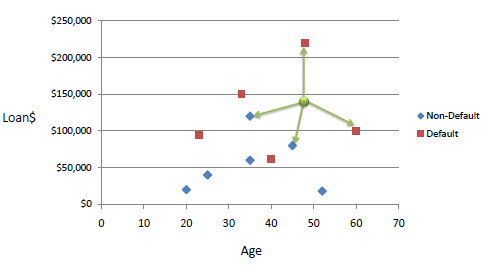

**You can find the source code at github on:** https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/knn.py

___
2) SVM:

In [196]:
import numpy as np


class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.name = 'SVM'
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
    
    def scores(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

A Support Vector Machine (SVM) performs classification by finding the hyperplane that maximizes the margin between the two classes. The vectors (cases) that define the hyperplane are the support vectors.		
**Algorithm:**
1) Define an optimal hyperplane: maximize margin.\
2) Extend the above definition for non-linearly separable problems: have a penalty term for misclassifications.\
3) Map data to high dimensional space where it is easier to classify with linear decision surfaces: reformulate problem so that data is mapped implicitly to this space.

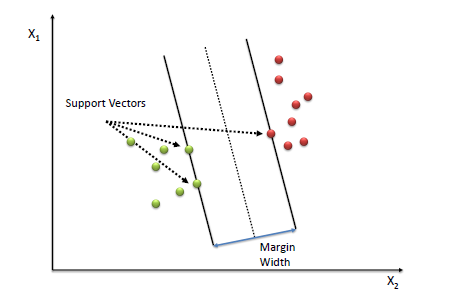

**You can find the source code at github on:** https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/svm.py

**Now Training our models:**
**But**, before training our data we have to split this data into a train and test set, this rule we use for computing our generalization error.
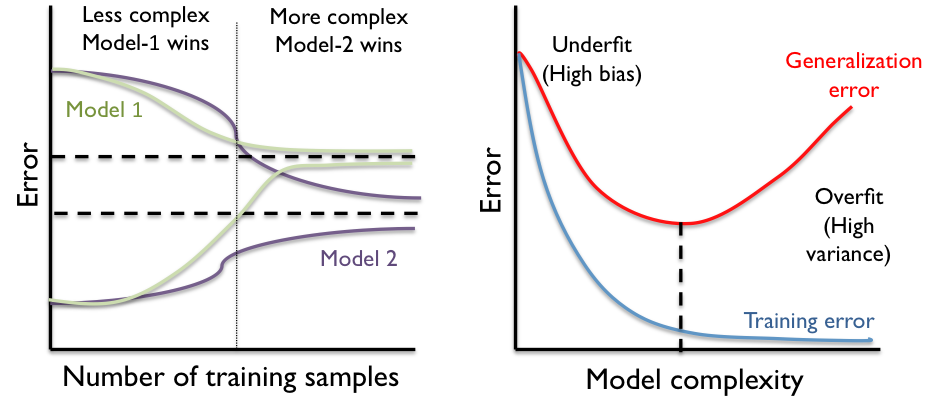

We can do this by hard coding, but for simplicity we can use train_test_split module of the sikit learn library.\
**Check sklearn dcumentation for further details:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)

In [166]:
print(type(X_train))
print(X_train.shape)
X_train.head()

<class 'pandas.core.frame.DataFrame'>
(120, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


**Now, we can train our models on these data,:**\
**KNN** is calssified as a lazy model which just work when prediction and have no mathematical model to predict classes.\
**SVM** train first and then predict based a decision rule, here we are using Hard Margin SVM.

In [264]:
knn = KNN()
svc = SVM()

**We now do a cross validation step**\
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.


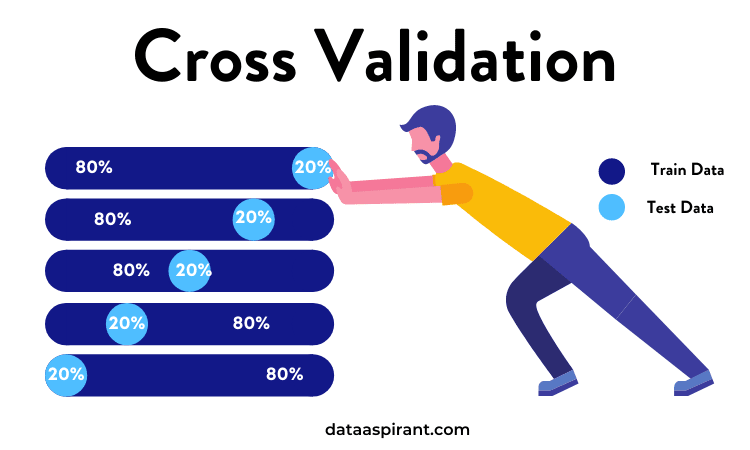

we prefere to use a stratified k-fold, for more info. check this out: https://machinelearningmastery.com/k-fold-cross-validation/ 

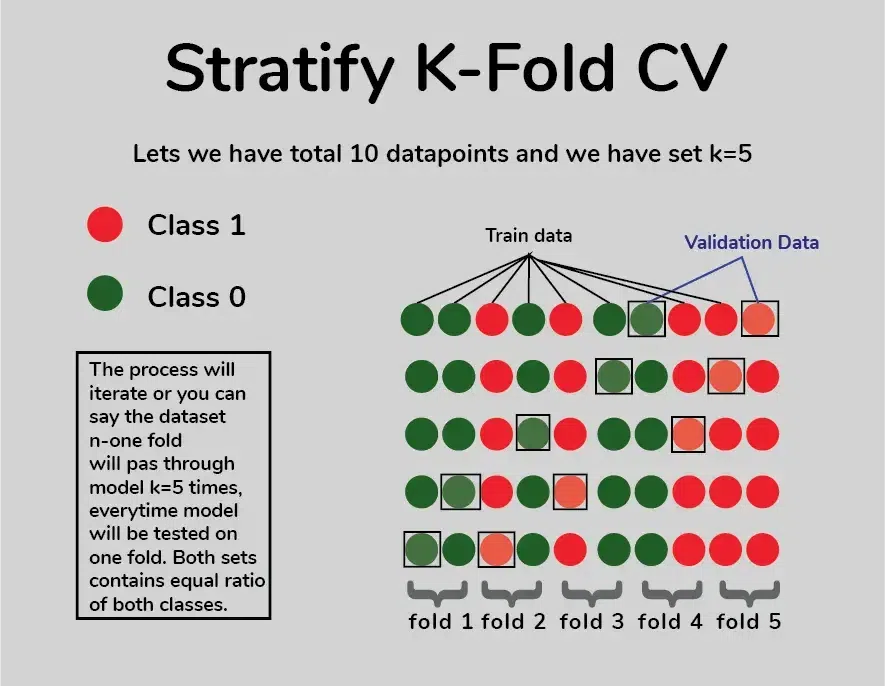
**Now as we are not using sklearn models, we have to build our cross validation function from scratch.**

In [168]:
from sklearn.model_selection import StratifiedKFold
strkf = StratifiedKFold(n_splits = 3)

**Now we will define our own function that memic what sklearn.metrics.score do, check this out:**\
    https://scikit-learn.org/stable/modules/model_evaluation.html

In [192]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    return model.scores(y_test, y_predict)

**Now defining the cross validation function:**

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def cross_valid(model, x, y, cv=5, scale=False):
    scores = []
    for train_index, test_index in cv.split(x, y):
        x_train = iris.data[train_index] 
        x_test = iris.data[test_index]
        y_train = iris.target[train_index]
        y_test = iris.target[test_index]
        
        if scale:
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.fit_transform(x_test)

        scores.append(get_score(model, x_train, x_test, y_train, y_test))
    return scores

## performing cross validation on the different models:
**1) Using all (x, y) data without scalling**

In [218]:
for model in [knn, svc]:
    print
    score = cross_valid(model, x, y, cv=strkf)
    print(f'Score of {model.name} = ({score})')

Score of KNN = ([0.98, 0.96, 0.98])
Score of SVM = ([0.34, 0.32, 0.34])


**2) Using all (x, y) data with scalling**

In [220]:
for model in [knn, svc]:
    print
    score = cross_valid(model, x, y, cv=strkf, scale=True)
    print(f'Score of {model.name} = ({score})')

Score of KNN = ([0.98, 0.94, 0.98])
Score of SVM = ([0.34, 0.32, 0.34])


**3) Using all (X_train, Y_train) data without scalling**

In [219]:
for model in [knn, svc]:
    print
    score = cross_valid(model, X_train, Y_train, cv=strkf)
    print(f'Score of {model.name} = ({score})')

Score of KNN = ([1.0, 0.95, 0.5])
Score of SVM = ([0.0, 0.75, 0.5])


**4) Using all (X_train, Y_train) data with scalling**

In [221]:
for model in [knn, svc]:
    print
    score = cross_valid(model, X_train, Y_train, cv=strkf, scale=True)
    print(f'Score of {model.name} = ({score})')

Score of KNN = ([0.025, 0.45, 0.05])
Score of SVM = ([0.0, 0.75, 0.05])


**As we have seen that the well stratifed data achieved balance in data so we were able get balance and so more accuracy in predicting**\
**We can check how the stratified sampling affects the data**

In [232]:
strkf = StratifiedKFold(n_splits = 3)
for train_index, test_index in strkf.split(x, y):
    print('Train indeces: ', train_index[:24])
    print('Test indeces: ', test_index[:24], '\n')

Train indeces:  [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Test indeces:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 50 51 52 53 54 55 56] 

Train indeces:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 34 35 36 37 38 39 40]
Test indeces:  [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 67 68 69 70 71 72 73] 

Train indeces:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Test indeces:  [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 83 84 85 86 87 88 89 90] 



In [229]:
strkf = StratifiedKFold(n_splits = 3)
for train_index, test_index in strkf.split(X_train, Y_train):
    print('Train indeces: ', train_index[:24])
    print('Test indeces: ', test_index[:24], '\n')

Train indeces:  [35 38 39 41 43 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Test indeces:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 

Train indeces:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Test indeces:  [35 38 39 41 43 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] 

Train indeces:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Test indeces:  [ 78  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103] 



## Performance Assessing:

***We first predict our values and measure upon it:***

In [282]:
x = iris.data
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn.fit(X_train, Y_train)
predicted = knn.predict(X_test)
print(predicted)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


**Constructing Performance metrics from scratch:**

In [281]:
def find_TP(y, y_hat):
   # counts the number of true positives (y = 1, y_hat = 1)
   return sum((y == 1) & (y_hat == 1))
def find_FN(y, y_hat):
   # counts the number of false negatives (y = 1, y_hat = 0) Type-II error
   return sum((y == 1) & (y_hat == 0))
def find_FP(y, y_hat):
   # counts the number of false positives (y = 0, y_hat = 1) Type-I error
   return sum((y == 0) & (y_hat == 1))
def find_TN(y, y_hat):
   # counts the number of true negatives (y = 0, y_hat = 0)
   return sum((y == 0) & (y_hat == 0))

In [283]:
TP = find_TP(Y_test, predicted)
FN = find_FN(Y_test, predicted)
FP = find_FP(Y_test, predicted)
TN = find_TN(Y_test, predicted)
print('TP:',TP)
print('FN:',FN)
print('FP:',FP)
print('TN:',TN)
precision = TP/(TP+FP)
print('Precision:',precision)

TP: 9
FN: 0
FP: 0
TN: 10
Precision: 1.0


In [290]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

1.0


In [293]:
precision = (TP)/(TP+FP)
print(precision)

1.0


In [292]:
recall = (FN)/(TP+FN)
print(recall)

0.0


In [287]:
confusion_matrix = np.array([[TP, FN], [FP, TN]])
print(confusion_matrix)

[[ 9  0]
 [ 0 10]]


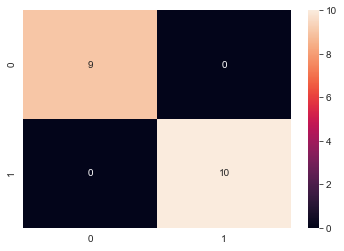

In [286]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

***As we Saw, our implemented models gives good accuracy, but now we will use sklearn models and compare***

# Using sklearn Models and built in functions:

In [294]:
x = iris.data
y = iris.target

In [297]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [298]:
clf_knn = KNeighborsClassifier()
clf_svc = SVC()

In [299]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [302]:
clf_knn.fit(x_train, y_train)
clf_svc.fit(x_train, y_train)

print('KNN Accuracy Score:', clf_knn.score(x_train, y_train))
print('SVC Accuracy Score:', clf_svc.score(x_train, y_train))

KNN Accuracy Score: 0.9666666666666667
SVC Accuracy Score: 0.975


***Note that we were using SVC with Hard Margin and no Kernels, so the accuracy was low compared to the sklean model***

---
## Cross Validation 

In [303]:
from sklearn.model_selection import cross_val_score

In [304]:
cross_val_score(clf_knn, x_train, y_train, cv=3, scoring='accuracy')

array([0.925, 0.9  , 0.975])

In [306]:
cross_val_score(clf_svc, x_train, y_train, cv=3, scoring='accuracy')

array([0.975, 0.9  , 0.975])

## Predicting values using cross_val_prediction()

In [307]:
from sklearn.model_selection import cross_val_predict 

In [315]:
y_predicted_knn = cross_val_predict(clf_knn, x_train, y_train, cv=3)
print(y_predicted_knn[:20])

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [316]:
y_predicted_svc = cross_val_predict(clf_svc, x_train, y_train, cv=3)
print(y_predicted_svc[:20])

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2]


---
## Using different metrics

### Confusion matrix

In [313]:
from sklearn.metrics import confusion_matrix

In [317]:
con_mtrx = confusion_matrix(y_train, y_predicted_knn)
print(con_mtrx)

[[40  0  0]
 [ 0 37  4]
 [ 0  4 35]]


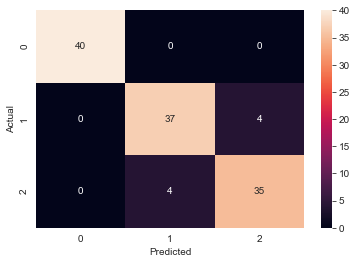

In [318]:
sns.heatmap(con_mtrx, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [319]:
con_mtrx = confusion_matrix(y_train, y_predicted_svc)
print(con_mtrx)

[[40  0  0]
 [ 0 37  4]
 [ 0  2 37]]


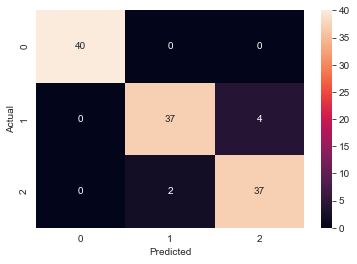

In [320]:
sns.heatmap(con_mtrx, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Precision

In [321]:
from sklearn.metrics import precision_score

In [324]:
# precision_score(y_train, y_predicted_knn)

### Recall

In [325]:
from sklearn.metrics import recall_score

In [326]:
# recall_score(y_train, y_predicted_knn)

### F1_score

#### F-score vs Accuracy
There are a number of metrics which can be used to evaluate a binary classification model, and accuracy is one of the simplest to understand. Accuracy is defined as simply the number of correctly categorized examples divided by the total number of examples. Accuracy can be useful but does not take into account the subtleties of class imbalances, or differing costs of false negatives and false positives.

**The F1-score is useful:**

* where there are either differing costs of false positives or false negatives, such as in the mammogram example

* or where there is a large class imbalance, such as if 10% of apples on trees tend to be unripe. In this case the accuracy would be misleading, since a classifier that classifies all apples as ripe would automatically get 90% accuracy but would be useless for real-life applications.

The accuracy has the advantage that it is very easily interpretable, but the disadvantage that it is not robust when the data is unevenly distributed, or where there is a higher cost associated with a particular type of error.

https://deepai.org/machine-learning-glossary-and-terms/f-score

In [327]:
# from sklearn.metrics import f1_score
# f1_score(y_train_6, y_predicted)

### Use decision_function() to find scores.

In [328]:
# prediction_scores = clf.decision_function(x_train)
# print(prediction_scores[:5])

In [330]:
# threshold=0
# prediction_scores[:5]>0